[0.9841806002933007, 0.7779091903393835, 0.5943584318177951, 0.5388383853934701, 0.44558492984390063, 0.2500479799318634, 0.16504190707357658, 0.09693374800604783, 0.09426352773074935, 0.07249700402308311, 0.06895641111792596, 0.05180981155439447]


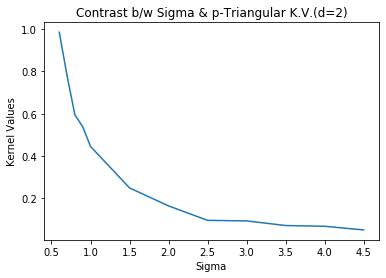

In [22]:
import numpy as np
from math import pi,e
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import scipy.linalg as la
import random

N=200
M=10
dim=2

def p_triangular_kernel(distances,p,sigma=1.0): 
    kernel_vals = 1-((distances/sigma)**p)
    return kernel_vals 

def distance_from_origin(data):
    temp_sum=0
    for k in range(dim):
        temp_sum+=data[k]**2
    dist=temp_sum**0.5
    return dist
    
random.seed(100)
actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))

sigmas=[0.6,0.7,0.8,0.9,1.0,1.5,2,2.5,3,3.5,4,4.5]
final_kernel_vals=[]

for sigma in sigmas:
    centroid, label = kmeans2(actual_data,M,minit='points')
    #print(centroid)
    centroid_distances_from_center=np.zeros(M)
       
    for i in range(M):
        centroid_distances_from_center[i]=distance_from_origin(centroid[i])
    #print(centroid_distances_from_center)
        
    farthest_centroid_distance=centroid_distances_from_center[0]
    f=0
    store_f=0
    for c in centroid_distances_from_center:
        if c>farthest_centroid_distance:
            farthest_centroid_distance=c
            store_f=f
        f=f+1
            
    farthest_centroid=centroid[store_f]
    #print(farthest_centroid)
        
    nearest_centroid_distance=centroid_distances_from_center[0]
    n=0
    store_n=0
    for c in centroid_distances_from_center:
        if c<nearest_centroid_distance:
            nearest_centroid_distance=c
            store_n=n
        n=n+1
            
    nearest_centroid=centroid[store_n]
    #print(nearest_centroid)
        
    distances_from_farthest_centroid = []
    distances_from_nearest_centroid = []
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-farthest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_farthest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-nearest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_nearest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    kernel_vals_for_farthest_centroid=np.zeros(N)
    kernel_vals_for_nearest_centroid=np.zeros(N)
    
    fd_5, fd_95 = np.percentile(distances_from_farthest_centroid,5),np.percentile(distances_from_farthest_centroid,95)
    fp_val=(np.log(0.95/0.05))/(np.log(fd_95/fd_5))
    nd_5, nd_95 = np.percentile(distances_from_nearest_centroid,5),np.percentile(distances_from_nearest_centroid,95)
    np_val=(np.log(0.95/0.05))/(np.log(nd_95/nd_5))
    
    for i in range(N):
        kernel_vals_for_farthest_centroid[i] = p_triangular_kernel(distances_from_farthest_centroid[i],fp_val,sigma)
        kernel_vals_for_nearest_centroid[i] = p_triangular_kernel(distances_from_nearest_centroid[i],np_val,sigma)
    
    temp_diff=0
    for l in range(N):
        temp_diff+=abs(kernel_vals_for_farthest_centroid[l]-kernel_vals_for_nearest_centroid[l])
    
    final_kernel_vals.append((1/N)*temp_diff)
        
#print(sigmas)
print(final_kernel_vals)
fig,ax=plt.subplots()
ax.set_title("Contrast b/w Sigma & p-Triangular K.V.(d="+str(dim)+")")
ax.set_xlabel('Sigma')
ax.set_ylabel('Kernel Values')
#ax.set_ylim(0.0,1.0)
plt.plot(sigmas,final_kernel_vals)
plt.savefig('Contrast between Sigma and p-Triangular Kernel Values for dim 2')
plt.show()







[1.00000000e+00 8.48422107e-02 4.18020166e-02 9.80416458e-03
 1.11467128e-03 6.44361232e-05 1.54309949e-07 3.56202733e-09
 4.83420779e-11 3.33996896e-11 2.95219834e-13 3.75200148e-14
 0.00000000e+00]


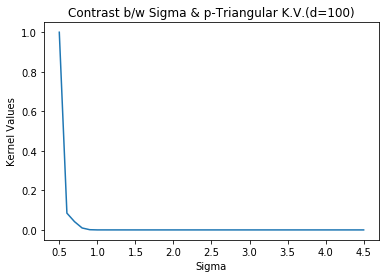

In [28]:
import numpy as np
from math import pi,e
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import scipy.linalg as la
import random

N=200
M=10
dim=100

def p_triangular_kernel(distances,p,sigma=1.0): 
    kernel_vals = 1-((distances/sigma)**p)
    return kernel_vals 

def distance_from_origin(data):
    temp_sum=0
    for k in range(dim):
        temp_sum+=data[k]**2
    dist=temp_sum**0.5
    return dist
    
random.seed(100)
actual_data = np.random.uniform(low=0.0, high=1.0, size=(N,dim))

sigmas=[0.5,0.6,0.7,0.8,0.9,1.0,1.5,2,2.5,3,3.5,4,4.5]
final_kernel_vals=[]

for sigma in sigmas:
    centroid, label = kmeans2(actual_data,M,minit='points')
    #print(centroid)
    centroid_distances_from_center=np.zeros(M)
       
    for i in range(M):
        centroid_distances_from_center[i]=distance_from_origin(centroid[i])
    #print(centroid_distances_from_center)
        
    farthest_centroid_distance=centroid_distances_from_center[0]
    f=0
    store_f=0
    for c in centroid_distances_from_center:
        if c>farthest_centroid_distance:
            farthest_centroid_distance=c
            store_f=f
        f=f+1
            
    farthest_centroid=centroid[store_f]
    #print(farthest_centroid)
        
    nearest_centroid_distance=centroid_distances_from_center[0]
    n=0
    store_n=0
    for c in centroid_distances_from_center:
        if c<nearest_centroid_distance:
            nearest_centroid_distance=c
            store_n=n
        n=n+1
            
    nearest_centroid=centroid[store_n]
    #print(nearest_centroid)
        
    distances_from_farthest_centroid = []
    distances_from_nearest_centroid = []
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-farthest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_farthest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    
        
    temp_sum=0
    temp_dist=0
    for data in actual_data:
        for d in range(dim):
            temp_sum+=(data[d]-nearest_centroid[d])**2
        
        temp_dist=temp_sum**0.5
        distances_from_nearest_centroid.append(temp_dist)
        temp_dist=0
        temp_sum=0
    kernel_vals_for_farthest_centroid=np.zeros(N)
    kernel_vals_for_nearest_centroid=np.zeros(N)
    
    fd_5, fd_95 = np.percentile(distances_from_farthest_centroid,5),np.percentile(distances_from_farthest_centroid,95)
    fp_val=(np.log(0.95/0.05))/(np.log(fd_95/fd_5))
    nd_5, nd_95 = np.percentile(distances_from_nearest_centroid,5),np.percentile(distances_from_nearest_centroid,95)
    np_val=(np.log(0.95/0.05))/(np.log(nd_95/nd_5))
    
    for i in range(N):
        kernel_vals_for_farthest_centroid[i] = p_triangular_kernel(distances_from_farthest_centroid[i],fp_val,sigma)
        kernel_vals_for_nearest_centroid[i] = p_triangular_kernel(distances_from_nearest_centroid[i],np_val,sigma)
    
    temp_diff=0
    for l in range(N):
        temp_diff+=abs(kernel_vals_for_farthest_centroid[l]-kernel_vals_for_nearest_centroid[l])
    
    final_kernel_vals.append((1/N)*temp_diff)
        
#print(sigmas)
final_kernel_vals=((final_kernel_vals)-np.min(final_kernel_vals))/(np.max(final_kernel_vals)-np.min(final_kernel_vals))
print(final_kernel_vals)
fig,ax=plt.subplots()
ax.set_title("Contrast b/w Sigma & p-Triangular K.V.(d="+str(dim)+")")
ax.set_xlabel('Sigma')
ax.set_ylabel('Kernel Values')
#ax.set_ylim(0.0,1.0)
plt.plot(sigmas,final_kernel_vals)
plt.savefig('Contrast between Sigma and p-Triangular Kernel Values for dim 100')
plt.show()




